In [1]:
#Import all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emera\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
#Import required dataset
df = pd.read_csv('Rootdirectory/BankofScotlandMobileApp3500rows.csv')


In [14]:
#Viewing the dataset
df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEfoM_PAk2huYxqXVNpnyJQ6DHBmNZSyVwMlOY...,Johnarchie Coull,https://play-lh.googleusercontent.com/a/AATXAJ...,Very helpful,5,0,NaN,2022-02-16 14:14:17,NaN,NaN
1,1,gp:AOqpTOGn_vIXY0HkE-K3sOYUTYz9aE5dmmUg581MGuG...,Chinwe Ochin,https://play-lh.googleusercontent.com/a/AATXAJ...,I am enjoying the app. It makes transaction ea...,5,0,84.05,2022-02-16 06:54:37,NaN,NaN
2,2,gp:AOqpTOFz-Th04wyvdJbMcBJR-IarDd4BuC6BfdY3f6-...,Smart-speakers Organization,https://play-lh.googleusercontent.com/a-/AOh14...,Satisfactory,5,0,84.05,2022-02-16 01:12:50,NaN,NaN
3,3,gp:AOqpTOEOZMcCGehTd7VfnxDUV2k8D_bmq0zeFcgcVKZ...,Gordon McEwen,https://play-lh.googleusercontent.com/a/AATXAJ...,Excellent,5,0,84.05,2022-02-15 20:21:37,NaN,NaN
4,4,gp:AOqpTOEycRKohd2qY6tGeWmTdmaSuP6wmzpP1y_5SmB...,Craig M,https://play-lh.googleusercontent.com/a/AATXAJ...,Most important app I use,5,0,83.02,2022-02-15 19:32:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,gp:AOqpTOFGg5gR462Ass-uGYYmqVQg2gXjV0xSjqjoAGz...,Anne MacDonald,https://play-lh.googleusercontent.com/a/AATXAJ...,"Very easy to ork with, and I feel very secure ...",5,0,60.02,2020-08-20 09:12:08,NaN,NaN
3496,3496,gp:AOqpTOHBPnXtUTbaOsAtbeMuI-NRXKp2Bq58gPZgMX4...,Elizabeth Davidson,https://play-lh.googleusercontent.com/a/AATXAJ...,Easy to access,5,0,60.02,2020-08-19 22:00:50,NaN,NaN
3497,3497,gp:AOqpTOFZGmgxeTEXCu9TDFRW_QMzQI8DjgfZzsQoW20...,Henry Leung,https://play-lh.googleusercontent.com/a/AATXAJ...,User friendly,5,0,60.02,2020-08-19 16:32:41,NaN,NaN
3498,3498,gp:AOqpTOHIupooXXYWpRoR2d4cyw3-wlgB3K3e_fwhMnG...,Elena Uslu,https://play-lh.googleusercontent.com/a/AATXAJ...,Awsome,5,0,60.02,2020-08-19 13:50:37,NaN,NaN


In [15]:
#Viewing the size of dataset
df.shape

(3500, 11)

In [16]:
#Viewing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3500 non-null   int64  
 1   reviewId              3500 non-null   object 
 2   userName              3500 non-null   object 
 3   userImage             3500 non-null   object 
 4   content               3500 non-null   object 
 5   score                 3500 non-null   int64  
 6   thumbsUpCount         3500 non-null   int64  
 7   reviewCreatedVersion  3190 non-null   float64
 8   at                    3500 non-null   object 
 9   replyContent          151 non-null    object 
 10  repliedAt             151 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 300.9+ KB


In [17]:
#Viewing the reviews
df.content.head()

0                                         Very helpful
1    I am enjoying the app. It makes transaction ea...
2                                         Satisfactory
3                                            Excellent
4                             Most important app I use
Name: content, dtype: object

In [18]:
#Dropping unnecessary columns
df = df.drop(['replyContent','repliedAt', 'reviewCreatedVersion', 'thumbsUpCount' ], axis=1)

In [19]:
df

,Unnamed: 0,reviewId,userName,userImage,content,score,at
0,0,gp:AOqpTOEfoM_PAk2huYxqXVNpnyJQ6DHBmNZSyVwMlOY...,Johnarchie Coull,https://play-lh.googleusercontent.com/a/AATXAJ...,Very helpful,5,2022-02-16 14:14:17
1,1,gp:AOqpTOGn_vIXY0HkE-K3sOYUTYz9aE5dmmUg581MGuG...,Chinwe Ochin,https://play-lh.googleusercontent.com/a/AATXAJ...,I am enjoying the app. It makes transaction ea...,5,2022-02-16 06:54:37
2,2,gp:AOqpTOFz-Th04wyvdJbMcBJR-IarDd4BuC6BfdY3f6-...,Smart-speakers Organization,https://play-lh.googleusercontent.com/a-/AOh14...,Satisfactory,5,2022-02-16 01:12:50
3,3,gp:AOqpTOEOZMcCGehTd7VfnxDUV2k8D_bmq0zeFcgcVKZ...,Gordon McEwen,https://play-lh.googleusercontent.com/a/AATXAJ...,Excellent,5,2022-02-15 20:21:37
4,4,gp:AOqpTOEycRKohd2qY6tGeWmTdmaSuP6wmzpP1y_5SmB...,Craig M,https://play-lh.googleusercontent.com/a/AATXAJ...,Most important app I use,5,2022-02-15 19:32:00
...,...,...,...,...,...,...,...
3495,3495,gp:AOqpTOFGg5gR462Ass-uGYYmqVQg2gXjV0xSjqjoAGz...,Anne MacDonald,https://play-lh.googleusercontent.com/a/AATXAJ...,"Very easy to ork with, and I feel very secure ...",5,2020-08-20 09:12:08
3496,3496,gp:AOqpTOHBPnXtUTbaOsAtbeMuI-NRXKp2Bq58gPZgMX4...,Elizabeth Davidson,https://play-lh.googleusercontent.com/a/AATXAJ...,Easy to access,5,2020-08-19 22:00:50
3497,3497,gp:AOqpTOFZGmgxeTEXCu9TDFRW_QMzQI8DjgfZzsQoW20...,Henry Leung,https://play-lh.googleusercontent.com/a/AATXAJ...,User friendly,5,2020-08-19 16:32:41
3498,3498,gp:AOqpTOHIupooXXYWpRoR2d4cyw3-wlgB3K3e_fwhMnG...,Elena Uslu,https://play-lh.googleusercontent.com/a/AATXAJ...,Awsome,5,2020-08-19 13:50:37


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3500 non-null   int64 
 1   reviewId    3500 non-null   object
 2   userName    3500 non-null   object
 3   userImage   3500 non-null   object
 4   content     3500 non-null   object
 5   score       3500 non-null   int64 
 6   at          3500 non-null   object
dtypes: int64(2), object(5)
memory usage: 191.5+ KB


In [23]:
#Renaming some columns 
df.rename(columns={'content': 'review', 'at': 'createdat'}, inplace=True)

In [24]:
df

,Unnamed: 0,reviewId,userName,userImage,review,score,createdat
0,0,gp:AOqpTOEfoM_PAk2huYxqXVNpnyJQ6DHBmNZSyVwMlOY...,Johnarchie Coull,https://play-lh.googleusercontent.com/a/AATXAJ...,Very helpful,5,2022-02-16 14:14:17
1,1,gp:AOqpTOGn_vIXY0HkE-K3sOYUTYz9aE5dmmUg581MGuG...,Chinwe Ochin,https://play-lh.googleusercontent.com/a/AATXAJ...,I am enjoying the app. It makes transaction ea...,5,2022-02-16 06:54:37
2,2,gp:AOqpTOFz-Th04wyvdJbMcBJR-IarDd4BuC6BfdY3f6-...,Smart-speakers Organization,https://play-lh.googleusercontent.com/a-/AOh14...,Satisfactory,5,2022-02-16 01:12:50
3,3,gp:AOqpTOEOZMcCGehTd7VfnxDUV2k8D_bmq0zeFcgcVKZ...,Gordon McEwen,https://play-lh.googleusercontent.com/a/AATXAJ...,Excellent,5,2022-02-15 20:21:37
4,4,gp:AOqpTOEycRKohd2qY6tGeWmTdmaSuP6wmzpP1y_5SmB...,Craig M,https://play-lh.googleusercontent.com/a/AATXAJ...,Most important app I use,5,2022-02-15 19:32:00
...,...,...,...,...,...,...,...
3495,3495,gp:AOqpTOFGg5gR462Ass-uGYYmqVQg2gXjV0xSjqjoAGz...,Anne MacDonald,https://play-lh.googleusercontent.com/a/AATXAJ...,"Very easy to ork with, and I feel very secure ...",5,2020-08-20 09:12:08
3496,3496,gp:AOqpTOHBPnXtUTbaOsAtbeMuI-NRXKp2Bq58gPZgMX4...,Elizabeth Davidson,https://play-lh.googleusercontent.com/a/AATXAJ...,Easy to access,5,2020-08-19 22:00:50
3497,3497,gp:AOqpTOFZGmgxeTEXCu9TDFRW_QMzQI8DjgfZzsQoW20...,Henry Leung,https://play-lh.googleusercontent.com/a/AATXAJ...,User friendly,5,2020-08-19 16:32:41
3498,3498,gp:AOqpTOHIupooXXYWpRoR2d4cyw3-wlgB3K3e_fwhMnG...,Elena Uslu,https://play-lh.googleusercontent.com/a/AATXAJ...,Awsome,5,2020-08-19 13:50:37


In [25]:
# Text preprocessing

df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for
x in x.split()))
df['review'] = df['review'].str.replace('[^\w\s]', "")
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df['review'] = df['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.review.head()

C:\Users\emera\AppData\Local\Temp/ipykernel_19468/355649819.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[^\w\s]', "")


0                               helpful
1    enjoying app make transaction easy
2                          satisfactory
3                             excellent
4                     important app use
Name: review, dtype: object

In [26]:
df

,Unnamed: 0,reviewId,userName,userImage,review,score,createdat
0,0,gp:AOqpTOEfoM_PAk2huYxqXVNpnyJQ6DHBmNZSyVwMlOY...,Johnarchie Coull,https://play-lh.googleusercontent.com/a/AATXAJ...,helpful,5,2022-02-16 14:14:17
1,1,gp:AOqpTOGn_vIXY0HkE-K3sOYUTYz9aE5dmmUg581MGuG...,Chinwe Ochin,https://play-lh.googleusercontent.com/a/AATXAJ...,enjoying app make transaction easy,5,2022-02-16 06:54:37
2,2,gp:AOqpTOFz-Th04wyvdJbMcBJR-IarDd4BuC6BfdY3f6-...,Smart-speakers Organization,https://play-lh.googleusercontent.com/a-/AOh14...,satisfactory,5,2022-02-16 01:12:50
3,3,gp:AOqpTOEOZMcCGehTd7VfnxDUV2k8D_bmq0zeFcgcVKZ...,Gordon McEwen,https://play-lh.googleusercontent.com/a/AATXAJ...,excellent,5,2022-02-15 20:21:37
4,4,gp:AOqpTOEycRKohd2qY6tGeWmTdmaSuP6wmzpP1y_5SmB...,Craig M,https://play-lh.googleusercontent.com/a/AATXAJ...,important app use,5,2022-02-15 19:32:00
...,...,...,...,...,...,...,...
3495,3495,gp:AOqpTOFGg5gR462Ass-uGYYmqVQg2gXjV0xSjqjoAGz...,Anne MacDonald,https://play-lh.googleusercontent.com/a/AATXAJ...,easy ork feel secure using app anne macdonald,5,2020-08-20 09:12:08
3496,3496,gp:AOqpTOHBPnXtUTbaOsAtbeMuI-NRXKp2Bq58gPZgMX4...,Elizabeth Davidson,https://play-lh.googleusercontent.com/a/AATXAJ...,easy access,5,2020-08-19 22:00:50
3497,3497,gp:AOqpTOFZGmgxeTEXCu9TDFRW_QMzQI8DjgfZzsQoW20...,Henry Leung,https://play-lh.googleusercontent.com/a/AATXAJ...,user friendly,5,2020-08-19 16:32:41
3498,3498,gp:AOqpTOHIupooXXYWpRoR2d4cyw3-wlgB3K3e_fwhMnG...,Elena Uslu,https://play-lh.googleusercontent.com/a/AATXAJ...,awsome,5,2020-08-19 13:50:37


In [27]:
# Dropping all null values

df = df.dropna()
df.count()

Unnamed: 0    3500
reviewId      3500
userName      3500
userImage     3500
review        3500
score         3500
createdat     3500
dtype: int64

In [28]:
# Exploratory data analysis using WordCloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import seaborn as sns

In [29]:
# Calculating all polarity scores 

sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["review"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["review"]]

In [30]:
df

,Unnamed: 0,reviewId,userName,userImage,review,score,createdat,Positive,Negative,Neutral,Compound
0,0,gp:AOqpTOEfoM_PAk2huYxqXVNpnyJQ6DHBmNZSyVwMlOY...,Johnarchie Coull,https://play-lh.googleusercontent.com/a/AATXAJ...,helpful,5,2022-02-16 14:14:17,1.000,0.0,0.000,0.4215
1,1,gp:AOqpTOGn_vIXY0HkE-K3sOYUTYz9aE5dmmUg581MGuG...,Chinwe Ochin,https://play-lh.googleusercontent.com/a/AATXAJ...,enjoying app make transaction easy,5,2022-02-16 06:54:37,0.677,0.0,0.323,0.7430
2,2,gp:AOqpTOFz-Th04wyvdJbMcBJR-IarDd4BuC6BfdY3f6-...,Smart-speakers Organization,https://play-lh.googleusercontent.com/a-/AOh14...,satisfactory,5,2022-02-16 01:12:50,1.000,0.0,0.000,0.3612
3,3,gp:AOqpTOEOZMcCGehTd7VfnxDUV2k8D_bmq0zeFcgcVKZ...,Gordon McEwen,https://play-lh.googleusercontent.com/a/AATXAJ...,excellent,5,2022-02-15 20:21:37,1.000,0.0,0.000,0.5719
4,4,gp:AOqpTOEycRKohd2qY6tGeWmTdmaSuP6wmzpP1y_5SmB...,Craig M,https://play-lh.googleusercontent.com/a/AATXAJ...,important app use,5,2022-02-15 19:32:00,0.474,0.0,0.526,0.2023
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,gp:AOqpTOFGg5gR462Ass-uGYYmqVQg2gXjV0xSjqjoAGz...,Anne MacDonald,https://play-lh.googleusercontent.com/a/AATXAJ...,easy ork feel secure using app anne macdonald,5,2020-08-20 09:12:08,0.469,0.0,0.531,0.6486
3496,3496,gp:AOqpTOHBPnXtUTbaOsAtbeMuI-NRXKp2Bq58gPZgMX4...,Elizabeth Davidson,https://play-lh.googleusercontent.com/a/AATXAJ...,easy access,5,2020-08-19 22:00:50,0.744,0.0,0.256,0.4404
3497,3497,gp:AOqpTOFZGmgxeTEXCu9TDFRW_QMzQI8DjgfZzsQoW20...,Henry Leung,https://play-lh.googleusercontent.com/a/AATXAJ...,user friendly,5,2020-08-19 16:32:41,0.762,0.0,0.238,0.4939
3498,3498,gp:AOqpTOHIupooXXYWpRoR2d4cyw3-wlgB3K3e_fwhMnG...,Elena Uslu,https://play-lh.googleusercontent.com/a/AATXAJ...,awsome,5,2020-08-19 13:50:37,0.000,0.0,1.000,0.0000


In [31]:

'''Adding Labels to catergorize the scores calculated above
Industry Standard says "if compound score is >0.05 then Positive, if <-0.05 then Negative, otherwise Neutral"
Knowing this i'm adding a new column called Sentiment to hold the sentiments''' 

score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment

In [32]:
df

,Unnamed: 0,reviewId,userName,userImage,review,score,createdat,Positive,Negative,Neutral,Compound,Sentiment
0,0,gp:AOqpTOEfoM_PAk2huYxqXVNpnyJQ6DHBmNZSyVwMlOY...,Johnarchie Coull,https://play-lh.googleusercontent.com/a/AATXAJ...,helpful,5,2022-02-16 14:14:17,1.000,0.0,0.000,0.4215,Positive
1,1,gp:AOqpTOGn_vIXY0HkE-K3sOYUTYz9aE5dmmUg581MGuG...,Chinwe Ochin,https://play-lh.googleusercontent.com/a/AATXAJ...,enjoying app make transaction easy,5,2022-02-16 06:54:37,0.677,0.0,0.323,0.7430,Positive
2,2,gp:AOqpTOFz-Th04wyvdJbMcBJR-IarDd4BuC6BfdY3f6-...,Smart-speakers Organization,https://play-lh.googleusercontent.com/a-/AOh14...,satisfactory,5,2022-02-16 01:12:50,1.000,0.0,0.000,0.3612,Positive
3,3,gp:AOqpTOEOZMcCGehTd7VfnxDUV2k8D_bmq0zeFcgcVKZ...,Gordon McEwen,https://play-lh.googleusercontent.com/a/AATXAJ...,excellent,5,2022-02-15 20:21:37,1.000,0.0,0.000,0.5719,Positive
4,4,gp:AOqpTOEycRKohd2qY6tGeWmTdmaSuP6wmzpP1y_5SmB...,Craig M,https://play-lh.googleusercontent.com/a/AATXAJ...,important app use,5,2022-02-15 19:32:00,0.474,0.0,0.526,0.2023,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,gp:AOqpTOFGg5gR462Ass-uGYYmqVQg2gXjV0xSjqjoAGz...,Anne MacDonald,https://play-lh.googleusercontent.com/a/AATXAJ...,easy ork feel secure using app anne macdonald,5,2020-08-20 09:12:08,0.469,0.0,0.531,0.6486,Positive
3496,3496,gp:AOqpTOHBPnXtUTbaOsAtbeMuI-NRXKp2Bq58gPZgMX4...,Elizabeth Davidson,https://play-lh.googleusercontent.com/a/AATXAJ...,easy access,5,2020-08-19 22:00:50,0.744,0.0,0.256,0.4404,Positive
3497,3497,gp:AOqpTOFZGmgxeTEXCu9TDFRW_QMzQI8DjgfZzsQoW20...,Henry Leung,https://play-lh.googleusercontent.com/a/AATXAJ...,user friendly,5,2020-08-19 16:32:41,0.762,0.0,0.238,0.4939,Positive
3498,3498,gp:AOqpTOHIupooXXYWpRoR2d4cyw3-wlgB3K3e_fwhMnG...,Elena Uslu,https://play-lh.googleusercontent.com/a/AATXAJ...,awsome,5,2020-08-19 13:50:37,0.000,0.0,1.000,0.0000,Neutral


In [33]:
#Conducting a count to see the count of each sentiment we have
print(df["Sentiment"].value_counts())


Positive    2831
Neutral      428
Negative     241
Name: Sentiment, dtype: int64


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

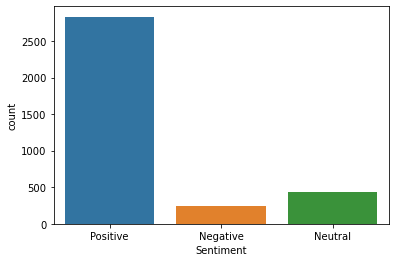

In [34]:

#Creating a count plot to see the visualization of each sentiment
sns.countplot(data = df, x = 'Sentiment')

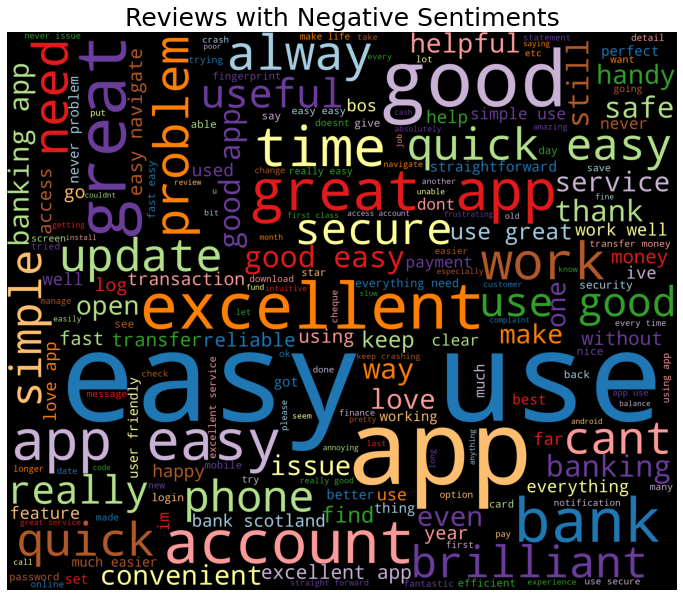

In [35]:
new_df=df[df['Sentiment']=='Negative']
words = ' '.join(df['review'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='Paired',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews with Negative Sentiments',fontsize=25)
plt.show()

In [36]:
#Exporting wordcloud file

wordcloud.to_file("wordcloud1BofSGooglePlay.png")

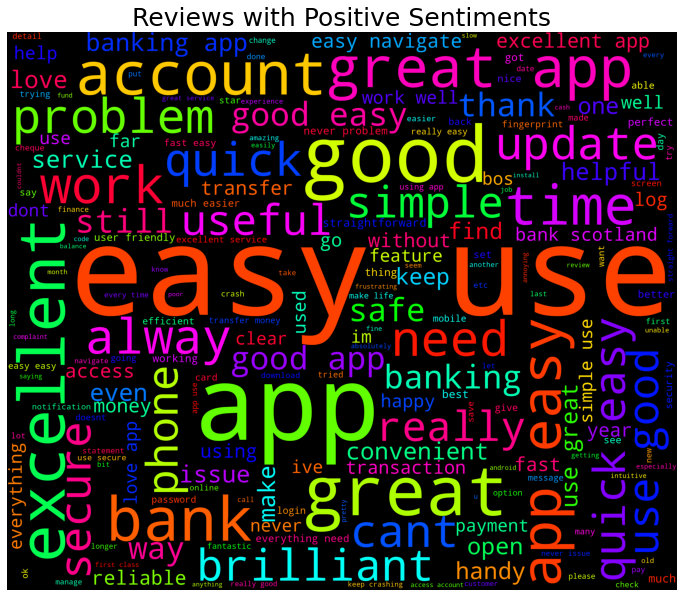

In [37]:
new_df1=df[df['Sentiment']=='Positive']
words = ' '.join(df['review'])

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='Black',
                      colormap='hsv',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Reviews with Positive Sentiments',fontsize=25)
plt.show()

In [38]:
wordcloud1.to_file("wordcloud2BofSGooglePlay.png")

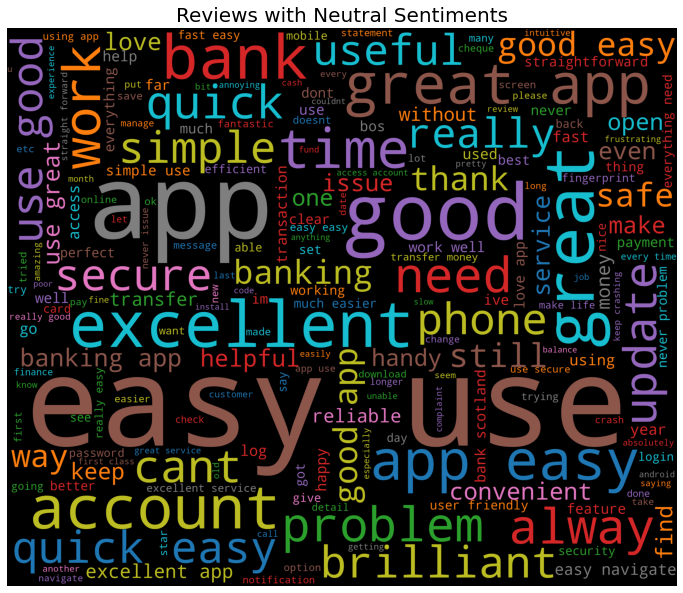

In [39]:
new_df2=df[df['Sentiment']=='Neutral']
words = ' '.join(df['review'])

wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='tab10',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Reviews with Neutral Sentiments',fontsize=20)
plt.show()

In [40]:
wordcloud2.to_file("wordcloud3BofSGooglePlay.png")

In [41]:

df.to_csv('SentimentLabelledBofSGooglePlay.csv')